# Policy-Based RL

Policy-based focuses on the actual effects of actions rather than estimates. Therefore, its output is not the value of the action, but the specific action.
The advantage is that the output actions can be continuous.

Reinforcement learning algorithms that only rely on strategy have poor performance in complex environments and are currently generally used together with value-based methods, namely Actor-Critic.

In [7]:
import gym
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
sys.path.append('.')
sys.path.append('../Online RL/policy-based')

In [8]:
env = gym.make('CartPole-v0')
env = env.unwrapped
A_DIM = env.action_space.n
S_DIM = env.observation_space.shape[0]
print(' State Dimensions : ', S_DIM)
print(' Action Dimensions : ', A_DIM)

 State Dimensions :  4
 Action Dimensions :  2


/root/miniconda3/envs/rl/lib/python3.9/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [9]:
EPOCHS = 500
MAX_STEPS=2000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
def move_avg(a,n=100,mode="valid"):	
    return(np.convolve(a, np.ones((n,))/n, mode=mode))	
    
def plot_G(model_name, rew): 
    plt.figure(figsize=[15, 6])
    
    plt.subplot(1,2,1)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name)

    plt.subplot(1,2,2)
    rew = move_avg(rew)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name+'(avg)')
    plt.show()

In [11]:
from policygradient import PolicyGradient

agent = PolicyGradient(A_DIM)

In [12]:
loss_total = list()
rew = list()
for epoch in range(EPOCHS):
    obs = env.reset()[0]
    done = False
    for t in range(MAX_STEPS):
        # if epoch > 300:
        #     env.render()
        action = agent.choose_action(obs)
        obs_next, reward, done, truncated, info = env.step(action)
        x, x_dot, theta, theta_dot = obs_next

        r1 = (env.x_threshold - abs(x)) / env.x_threshold - 0.8
        r2 = (env.theta_threshold_radians - abs(theta)) / env.theta_threshold_radians - 0.5
        reward = r1 + r2
            
        agent.add_transition(obs, action, reward)
        final_reward = sum(agent.ep_rew)
        
        if done:
            loss = agent.learn()
            print('Ep: ', epoch,' | reward:%.3f'%final_reward, ' | loss:%.4f'%loss)
            break
       
        obs = obs_next
        
    loss_total.append(loss.cpu().detach().numpy())
    rew.append(final_reward)
    

/root/Projects/OfflineRL/RL_algorithms/notebooks/../Online RL/policy-based/policygradient.py:87: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608883701/work/torch/csrc/utils/tensor_new.cpp:274.)
  b_obs = Variable(torch.FloatTensor(self.ep_obs)).to(self.device)


Ep:  0  | reward:4.699  | loss:0.0319
Ep:  1  | reward:8.042  | loss:-0.0125
Ep:  2  | reward:3.912  | loss:-0.0112
Ep:  3  | reward:1.483  | loss:0.0463
Ep:  4  | reward:13.886  | loss:0.0900
Ep:  5  | reward:5.607  | loss:0.0298
Ep:  6  | reward:8.451  | loss:-0.0184
Ep:  7  | reward:2.174  | loss:0.0361
Ep:  8  | reward:4.618  | loss:0.0037
Ep:  9  | reward:9.175  | loss:0.0410
Ep:  10  | reward:6.347  | loss:-0.0161
Ep:  11  | reward:22.078  | loss:-0.0113
Ep:  12  | reward:7.827  | loss:-0.0115
Ep:  13  | reward:5.488  | loss:0.0027
Ep:  14  | reward:8.951  | loss:-0.0189
Ep:  15  | reward:4.026  | loss:-0.0227
Ep:  16  | reward:2.381  | loss:-0.0466
Ep:  17  | reward:24.275  | loss:0.0052
Ep:  18  | reward:8.536  | loss:0.0050
Ep:  19  | reward:4.326  | loss:-0.0228
Ep:  20  | reward:9.014  | loss:0.0090
Ep:  21  | reward:1.871  | loss:-0.0309
Ep:  22  | reward:15.249  | loss:-0.0053
Ep:  23  | reward:7.286  | loss:-0.0133
Ep:  24  | reward:18.116  | loss:0.0068
Ep:  25  | reward

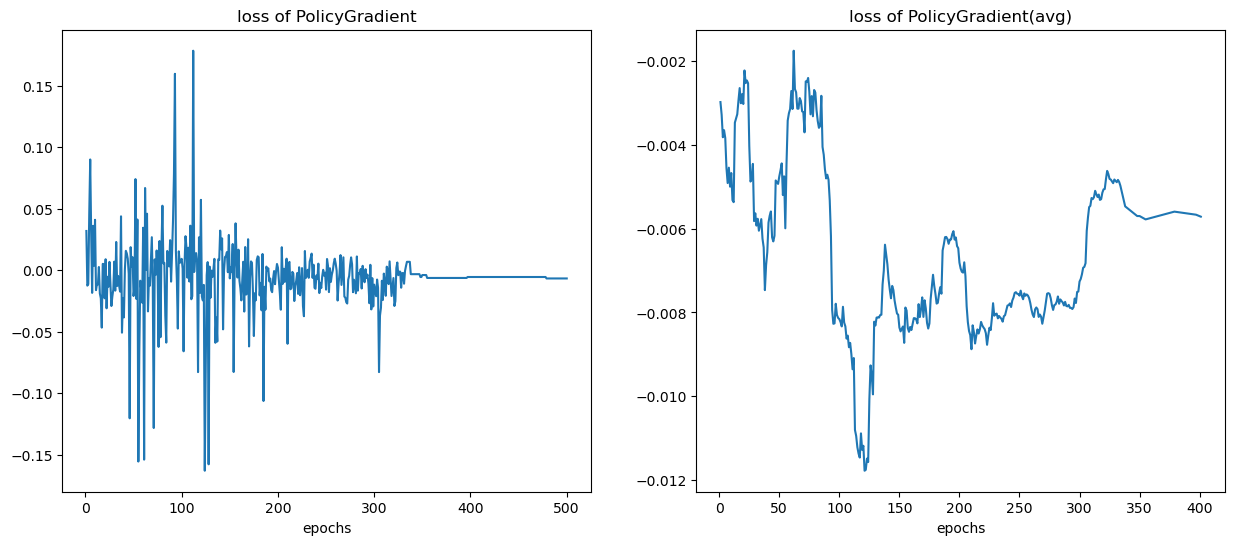

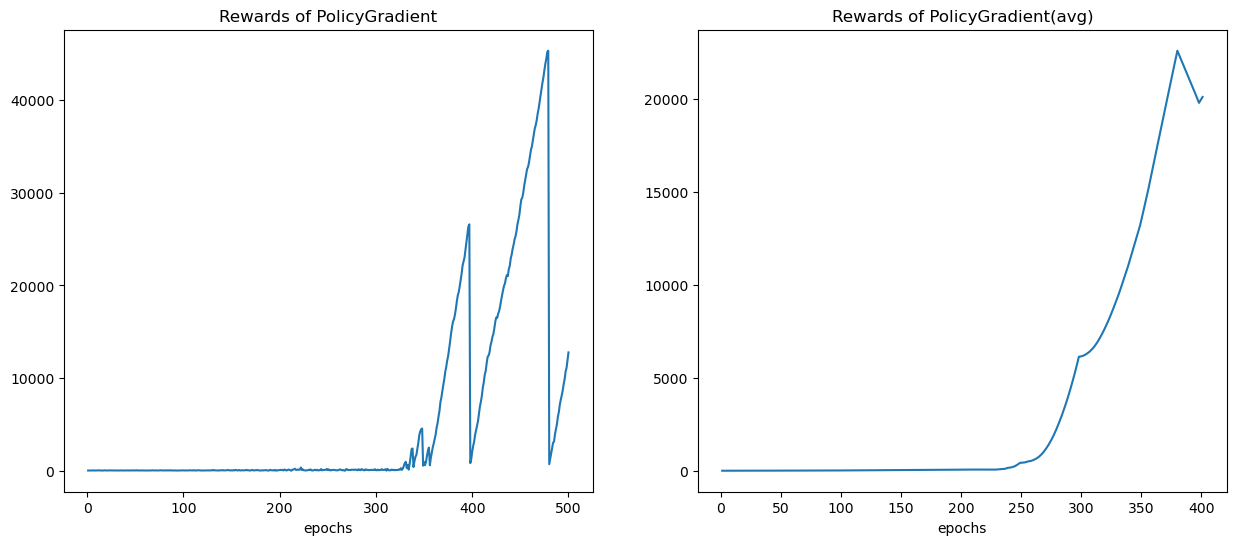

In [13]:
plot_G('loss of PolicyGradient', loss_total)
plot_G('Rewards of PolicyGradient', rew)